In [ ]:
# 데이터 분석 프로세스
# 주제선정 ->  데이터 수집 -> 데이터 전처리 -> 데이터 분석 -> 인사이트 도출

In [27]:
import requests
import os
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pathlib
import matplotlib

In [7]:
url_data='https://github.com/wikibook/python-for-data-analysis-rev/raw/master/readme.txt'
url=requests.get(url_data)
file_name='C:\myPyCode\data/readme.txt'
with open(file_name,'wb') as f:
    f.write(url.content)

In [10]:
os.path.isfile(file_name)
os.listdir('data')

['.ipynb_checkpoints',
 '27.서울시_주요공원현황.csv',
 'Andy.xlsx',
 'Andy2.xlsx',
 'Becky.xlsx',
 'Becky2.xlsx',
 'Chris.xlsx',
 'Chris2.xlsx',
 'coffeeShopSales.txt',
 'data_chart_in_excel.xlsx',
 'data_image_to_excel.xlsx',
 'Integrated.xlsx',
 'readme.txt',
 'save_DataFrame.csv',
 'sea_rain1.csv',
 'sea_rain1_from_notepad.csv',
 '학생시험성적.xlsx',
 '학생시험성적1.xlsx']

In [15]:
dic={'제품1':[250,200,150,120,np.nan],'제품2':[150,160,200,230,250],
    '제품3':[np.nan,170,100,130,140],'제품4':[np.nan,np.nan,150,170,np.nan]}
df=pd.DataFrame(dic,index=[2015,2016,2017,2018,2019])
df

,제품1,제품2,제품3,제품4
2015,250.0,150,NaN,NaN
2016,200.0,160,170.0,NaN
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,NaN,250,140.0,NaN


In [18]:
# 결측치 처리
len(df)-df.count()
df.drop(index=[2015],columns=['제품3'])
df.dropna(subset=['제품1'])
df.fillna(0)
values={'제품1':100,'제품4':160}
df.fillna(value=values)

,제품1,제품2,제품3,제품4
2015,250.0,150,NaN,160.0
2016,200.0,160,170.0,160.0
2017,150.0,200,100.0,150.0
2018,120.0,230,130.0,170.0
2019,100.0,250,140.0,160.0


In [43]:
%%writefile C:\myPyCode\data\total_sales_data.csv
매장명,제품종류,모델명,판매,재고
A,스마트폰,S1,1,2
A,스마트폰,S2,2,5
A,TV,V1,3,5
B,스마트폰,S2,4,6
B,스마트폰,S1,5,8
B,TV,V1,6,9
C,스마트폰,S2,2,4
C,TV,V1,3,6
C,TV,V2,7,9

Writing C:\myPyCode\data\total_sales_data.csv


In [51]:
data_file='C:/myPyCode/data/total_sales_data.csv'
df_sales=pd.read_csv(data_file)
df_sales.info()
df_sales['매장명'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     9 non-null      object
 1   제품종류    9 non-null      object
 2   모델명     9 non-null      object
 3   판매      9 non-null      int64 
 4   재고      9 non-null      int64 
dtypes: int64(2), object(3)
memory usage: 488.0+ bytes


C    3
A    3
B    3
Name: 매장명, dtype: int64

In [56]:
df_sales.pivot_table(index=['매장명','제품종류','모델명'],values=['재고','판매'])
df_sales.pivot_table(index=['매장명'],columns=['제품종류'],values=['재고','판매'],aggfunc='sum')

재고       판매     
제품종류  TV 스마트폰  TV 스마트폰
매장명                   
A      5    7   3    3
B      9   14   6    9
C     15    4  10    2

In [57]:
!pip install wordcloud

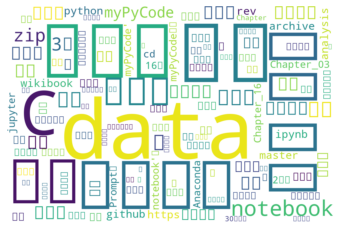

In [23]:
file_name="C:/myPyCode/data/readme.txt"
with open(file_name,encoding='utf-8') as f:
    text=f.read()
text.strip()
wordcloud_image=WordCloud(background_color='white',width=1200,height=800,max_font_size=300).generate(text)
plt.figure()
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.axis('off')
plt.show()
?plt.imshow

In [86]:
index_col=['단어','산업혁명','기술','사업','혁신','경제']
dic={'빈도':[0,1662,1223,1126,1084,1000]}
df=pd.DataFrame(dic,index=index_col)
df

,빈도
단어,0
산업혁명,1662
기술,1223
사업,1126
혁신,1084
경제,1000


In [87]:
korean_font_path = 'C:/Windows/Fonts/malgun.ttf'
wc=WordCloud(font_path=korean_font_path,background_color='white')
frequencies=df['빈도']
wordcloud_image=wc.generate_from_frequencies(frequencies)

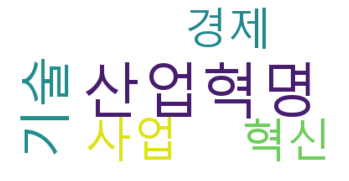

In [88]:
plt.imshow(wordcloud_image,interpolation='bilinear')
plt.axis('off')
plt.show()

In [120]:
def get_seoul_expense_list(extension,year,data_folder):
    url_data='https://github.com/seoul-opengov/opengov/raw/master/expense_list' + str(year)+'/'
    expense_list_year_dir= data_folder + str(year) + '/'
    
    if os.path.isdir(expense_list_year_dir):
        print('{0}년 데이터 폴더가 이미 있습니다. {0}년 데이터의 다운로드를 시작합니다.'.format(year))
    else:
        print('{0}년 데이터 폴더가 없어서 생성했습니다. {0}년 데이터의 다운로드를 시작합니다.'.format(year))
    
    pathlib.Path(expense_list_year_dir).mkdir(parents=True,exist_ok=True)
    
    for k in range(1,13):
        file_name='{0}{1:02d}_expense_list.{2}'.format(year,k,extension)
        url = url_data + file_name
        print(url)
        r=requests.get(url)
        with open(expense_list_year_dir + file_name,'wb') as f:
            f.write(r.content)

In [121]:
extension='csv'
year=2017
data_folder='C:/myPyCode/data/seoul_expense/'
get_seoul_expense_list('csv',2017,data_folder)

2017년 데이터 폴더가 이미 있습니다. 2017년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201701_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201702_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201703_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201704_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201705_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201706_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201707_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201708_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201709_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201710_expense_list.csv
https://github.com/seou

In [122]:
data_folder="C:/myPyCode/data/seoul_expense/"
years=[2017,2018,2019]
extension='csv'
for year in years:
    get_seoul_expense_list(extension,year,data_folder)

2017년 데이터 폴더가 이미 있습니다. 2017년 데이터의 다운로드를 시작합니다.
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201701_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201702_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201703_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201704_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201705_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201706_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201707_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201708_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201709_expense_list.csv
https://github.com/seoul-opengov/opengov/raw/master/expense_list2017/201710_expense_list.csv
https://github.com/seou

In [123]:
data_file=data_folder+'2017/201701_expense_list.csv'
with open(data_file,encoding='utf-8') as f:
    line1 = f.readline()
    line2 = f.readline()
    line3 = f.readline()
    
    print(line1)
    print(line2)
    print(line3)

﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-26 13:10","동해일식 (중구 무교동)","기본소득과 장애인복지 논의간담회","장애인복지정책팀장 외 2명",카드,76000

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-25 22:41","김앤장 (중구 무교로)","장애인단체 활동지원 논의간담회","장애인복지정책과장 외 3명",카드,102000



In [125]:
print(len(line1.split(',')))
print(len(line2.split(',')))
print(len(line3.split(',')))

20
20
20


In [142]:
def change_csv_file_first_line_value(old_file_name,new_file_name):
    with open(old_file_name,encoding='utf-8') as f:
        lines=f.read().splitlines()
        print(lines[0])
    lines[0]='nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액'
    print(lines[0])
        
    with open(new_file_name,'w',encoding='utf-8') as f:
        f.write('\n'.join(lines))

In [144]:
old_file_name="C:/myPyCode/data/seoul_expense/2017/201701_expense_list.csv"
new_file_name="C:/myPyCode/data/seoul_expense/2017/201701_expense_list_new.csv"
change_csv_file_first_line_value(old_file_name,new_file_name)
with open(new_file_name, encoding='utf-8') as f:
    for k in range(3):
        print(f.readline())

﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-26 13:10","동해일식 (중구 무교동)","기본소득과 장애인복지 논의간담회","장애인복지정책팀장 외 2명",카드,76000

11430252,"2017년 1월 장애인복지정책과 업무추진비 집행내역",http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,,,2017,1,,,,"복지본부 장애인복지정책과","2017-01-25 22:41","김앤장 (중구 무교로)","장애인단체 활동지원 논의간담회","장애인복지정책과장 외 3명",카드,102000



In [146]:
def change_year_csv_file_first_line_value(year,data_folder):
    expense_list_year_dir = data_folder + str(year) + '/'
    extension='csv'
    for k in range(1,13):
        old_file_name=expense_list_year_dir + '{0}{1:02d}_expense_list.{2}'.format(year,k,extension)
        new_file_name=expense_list_year_dir + '{0}{1:02d}_expense_list_new.{2}'.format(year,k,extension)
        change_csv_file_first_line_value(old_file_name,new_file_name)

In [147]:
data_folder = 'C:/myPyCode/data/seoul_expense/'
years=[2017,2018,2019]
for year in years:
    print("{}년 데이터의 첫 번째 줄의 열 이름을 변경 후 새 파일에 저장.".format(year))
    change_year_csv_file_first_line_value(year,data_folder)
print('end function')

2017년 데이터의 첫 번째 줄의 열 이름을 변경 후 새 파일에 저장.
﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
﻿ni

nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
﻿nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,dept_nm_full,exec_dt,exec_loc,exec_purpose,target_nm,payment_method,exec_amount
nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행

In [152]:
expense_list2017_dir = 'C:/myPyCode/data/seoul_expense/2017/'
file_name='201701_expense_list_new.csv'
df=pd.read_csv(expense_list2017_dir+file_name)

,nid,제목,url,부서레벨1,부서레벨2,부서레벨3,부서레벨4,부서레벨5,집행연도,집행월,예산,집행,구분,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액
0,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000
1,11430252,2017년 1월 장애인복지정책과 업무추진비 집행내역,http://opengov.seoul.go.kr/public/11430252,서울시본청,복지본부,장애인복지정책과,NaN,NaN,2017,1,NaN,NaN,NaN,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000


In [158]:
year=2017
expense_list_year_dir = 'C:/myPyCode/data/seoul_expense/' + str(year) + '/'
df_year=pd.DataFrame()
extenstion='csv'

for k in range(1,13):
    
    file_name = '{0}{1:02d}_expense_list_new.{2}'.format(year,k,extension)
    df_month=pd.read_csv(expense_list_year_dir + file_name)
    print('{} month length is {}'.format(k,len(df_month)))
    df_year=df_year.append(df_month,ignore_index=True)


1month length is 5517
2month length is 5768
3month length is 6114
4month length is 5408
5month length is 5429
6month length is 6124
7month length is 5652
8month length is 5654
9month length is 5690
10month length is 5053
11month length is 6437
12month length is 7286


In [157]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70132 entries, 0 to 70131
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nid     70132 non-null  int64  
 1   제목      70132 non-null  object 
 2   url     70132 non-null  object 
 3   부서레벨1   70132 non-null  object 
 4   부서레벨2   70074 non-null  object 
 5   부서레벨3   61262 non-null  object 
 6   부서레벨4   17939 non-null  object 
 7   부서레벨5   3474 non-null   object 
 8   집행연도    70132 non-null  int64  
 9   집행월     70132 non-null  int64  
 10  예산      3108 non-null   float64
 11  집행      2805 non-null   float64
 12  구분      1259 non-null   object 
 13  부서명     70053 non-null  object 
 14  집행일시    70132 non-null  object 
 15  집행장소    69360 non-null  object 
 16  집행목적    70110 non-null  object 
 17  대상인원    69597 non-null  object 
 18  결제방법    69929 non-null  object 
 19  집행금액    70132 non-null  int64  
dtypes: float64(2), int64(4), object(14)
memory usage: 10.7+ MB


In [159]:
df_year.isnull().sum()

nid          0
제목           0
url          0
부서레벨1        0
부서레벨2       58
부서레벨3     8870
부서레벨4    52193
부서레벨5    66658
집행연도         0
집행월          0
예산       67024
집행       67327
구분       68873
부서명         79
집행일시         0
집행장소       772
집행목적        22
대상인원       535
결제방법       203
집행금액         0
dtype: int64

In [170]:
year=2017
df_year_drop=df_year.drop(columns=['nid','url','부서레벨3','부서레벨4','부서레벨5',"예산","집행","구분"])
df_year_drop.head(2)
expense_list_tidy_file = '{}_expense_list_tidy.csv'.format(year)
df_year_drop.to_csv(expense_list_year_dir + expense_list_tidy_file,index=False)

In [173]:
os.path.isfile(expense_list_year_dir + expense_list_tidy_file)

True

In [174]:
def select_columns_save_file(year,data_folder,drop_columns_list):
    expense_list_year_dir = data_folder + str(year) + '/'
    expense_list_tidy_file = '{0}_expense_list_tidy.csv'.format(year)
    
    df_year=pd.DataFrame()
    for k in range(1,13):
        file_name = '{0}{1:02d}_expense_list_new.csv'.format(year,k)
        df_month = pd.read_csv(expense_list_year_dir + file_name)
        df_year=df_year.append(df_month,ignore_index=True)
    
    df_year_drop = df_year.drop(columns=drop_columns_list)
    new_file_name = expense_list_year_dir + expense_list_tidy_file
    df_year_drop.to_csv(new_file_name,index=False)
    print("=> {} 파일을 생성".format(expense_list_tidy_file))

In [176]:
data_folder='C:/myPyCode/data/seoul_expense/'
years=[2017,2018,2019]
drop_columns_list = ['nid','url','부서레벨3','부서레벨4','부서레벨5',"예산","집행","구분"]

for year in years:
    print('{}년 데이터를 정리해서 저장하고 있습니다.'.format(year))
    select_columns_save_file(year,data_folder,drop_columns_list)
print('all clear')

2017년 데이터를 정리해서 저장하고 있습니다.
=> 2017_expense_list_tidy.csv 파일을 생성
2018년 데이터를 정리해서 저장하고 있습니다.
=> 2018_expense_list_tidy.csv 파일을 생성
2019년 데이터를 정리해서 저장하고 있습니다.
=> 2019_expense_list_tidy.csv 파일을 생성
all clear


In [5]:
data_folder='C:/myPyCode/data/seoul_expense/'
years=[2017,2018,2019]
df_expense_all=pd.DataFrame()

for year in years:
    expense_list_year_dir=data_folder+str(year)+'/'
    expense_list_tidy_file="{}_expense_list_tidy.csv".format(year)
    path_file_name = expense_list_year_dir + expense_list_tidy_file
    df_expense = pd.read_csv(path_file_name)
    df_expense_all=df_expense_all.append(df_expense,ignore_index=True)

In [6]:
df_expense_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216557 entries, 0 to 216556
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   제목      216557 non-null  object
 1   부서레벨1   216557 non-null  object
 2   부서레벨2   216273 non-null  object
 3   집행연도    216557 non-null  int64 
 4   집행월     216557 non-null  int64 
 5   부서명     216478 non-null  object
 6   집행일시    216557 non-null  object
 7   집행장소    214401 non-null  object
 8   집행목적    216535 non-null  object
 9   대상인원    215535 non-null  object
 10  결제방법    216354 non-null  object
 11  집행금액    216557 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 19.8+ MB


In [25]:
year_expense=df_expense_all['집행연도'].value_counts()
year_expense

2019    74207
2018    72218
2017    70132
Name: 집행연도, dtype: int64

In [30]:
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

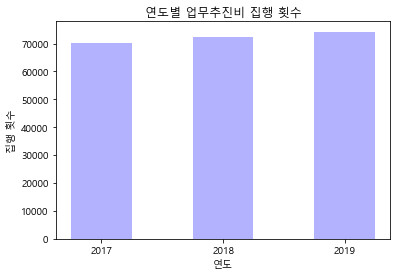

In [50]:
plt.bar(year_expense.index,year_expense.values,tick_label=year_expense.index,width=0.5,color='b',alpha=0.3)
plt.title('연도별 업무추진비 집행 횟수')
plt.xlabel('연도')
plt.ylabel('집행 횟수')
plt.show()

In [55]:
year_total=df_expense_all.pivot_table(index=['집행연도'],values=['집행금액'],aggfunc='sum')
year_total

,집행금액
집행연도,
2017,9076941387
2018,9937556542
2019,10532330632


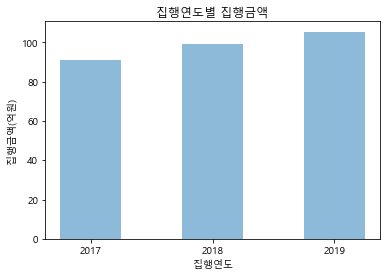

In [72]:
plt.bar(year_total.index,year_total['집행금액'].values/100000000,tick_label=year_total.index,alpha=0.5,width=0.5)
plt.title('집행연도별 집행금액')
plt.xlabel('집행연도')
plt.ylabel('집행금액(억원)')
plt.show()

In [77]:
month_total=df_expense_all.pivot_table(index=['집행월'],values=['집행금액'],aggfunc='sum')
year_month_total=df_expense_all.pivot_table(index=['집행월'],columns=['집행연도'],values=['집행금액'],aggfunc='sum')

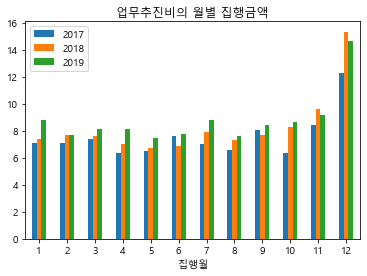

In [83]:
eok_won=100000000
(year_month_total/eok_won).plot.bar(rot=0)
plt.legend([2017,2018,2019])
plt.title('업무추진비의 월별 집행금액')
plt.show()

In [89]:
dept_level1_total=df_expense_all.pivot_table(index=['부서레벨1'],values=['집행금액'],aggfunc='sum')
dept_level2_total=df_expense_all.pivot_table(index=['부서레벨2'],values=['집행금액'],aggfunc='sum')
dept_level2_total
dept_level2_total_top10 = dept_level2_total.sort_values(by='집행금액',ascending=False)[0:10]
dept_level2_total_top10

,집행금액
부서레벨2,
상수도사업본부,2156404778
기획조정실,1572753168
행정국,1320839804
서울특별시장,955448760
시민소통기획관,923338423
도시기반시설본부,620669144
정무부시장,581806882
행정1부시장,540457390
행정2부시장,522277598


<Figure size 1008x576 with 0 Axes>

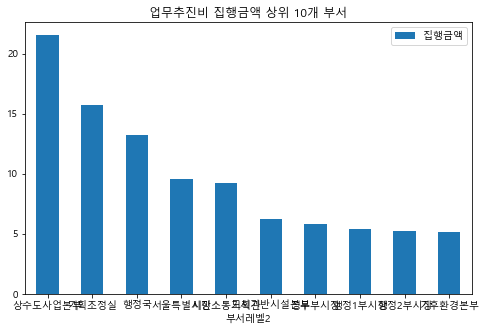

In [107]:
eok_won=100000000
plt.figure(1)
plt.rcParams['figure.figsize']=(8,5)
(dept_level2_total_top10/eok_won).plot.bar(rot=0,width=0.5)
plt.title('업무추진비 집행금액 상위 10개 부서')
plt.savefig('C:/myPyCode/test_image.png')
plt.show()

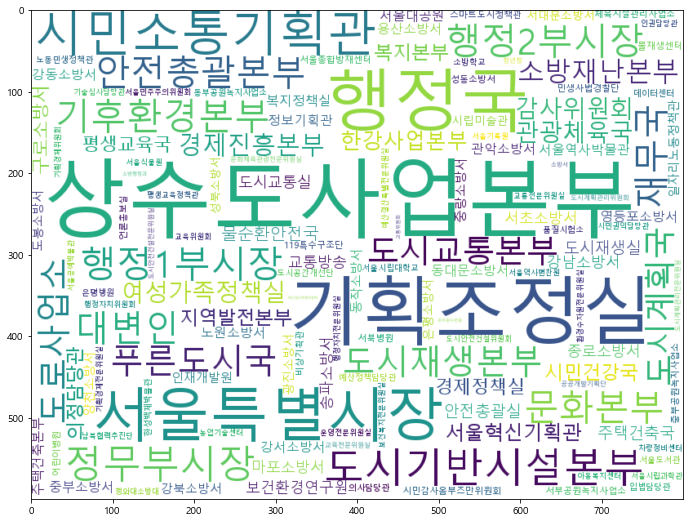

In [109]:
korean_font_path = 'C:/Windows/Fonts/malgun.ttf'
wc=WordCloud(background_color='white',font_path=korean_font_path,width=800,height=600)
frequencies=dept_level2_total['집행금액']
wordcloud_image=wc.generate_from_frequencies(frequencies)
plt.figure(figsize=(12,9))
plt.imshow(wordcloud_image,interpolation='bilinear')
plt.show()

In [115]:
expense_date_time=pd.to_datetime(df_expense_all['집행일시'])
expense_date_time.values

array(['2017-01-26T13:10:00.000000000', '2017-01-25T22:41:00.000000000',
       '2017-01-24T12:35:00.000000000', ...,
       '2019-12-19T11:34:00.000000000', '2019-12-16T12:39:00.000000000',
       '2019-12-03T17:35:00.000000000'], dtype='datetime64[ns]')

In [117]:
week_day_name=['월','화','수','목','금','토','일']
df_expense_all['집행일시_요일']=[week_day_name[weekday] for weekday in expense_date_time.dt.weekday]
df_expense_all['집행일시_시간']=[hour for hour in expense_date_time.dt.hour]
df_expense_all.head(4)

,제목,부서레벨1,부서레벨2,집행연도,집행월,부서명,집행일시,집행장소,집행목적,대상인원,결제방법,집행금액,집행일시_요일,집행일시_시간
0,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-26 13:10,동해일식 (중구 무교동),기본소득과 장애인복지 논의간담회,장애인복지정책팀장 외 2명,카드,76000,목,13
1,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-25 22:41,김앤장 (중구 무교로),장애인단체 활동지원 논의간담회,장애인복지정책과장 외 3명,카드,102000,수,22
2,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:35,왕왕생고기 (중구 을지로),장애인 기본돌봄 복지시책 논의간담회,장애인복지정책팀장외7명,카드,80000,화,12
3,2017년 1월 장애인복지정책과 업무추진비 집행내역,서울시본청,복지본부,2017,1,복지본부 장애인복지정책과,2017-01-24 12:23,서울불고기 (중구 남대문로),서울시일자리통합지원센터 운영개선 논의간담회,장애인복지정책과장외5명,카드,112000,화,12


In [122]:
expense_weekday=df_expense_all['집행일시_요일'].value_counts()
expense_weekday=expense_weekday.reindex(index=week_day_name)
expense_weekday

월    39498
화    43812
수    42343
목    45683
금    41381
토     2238
일     1602
Name: 집행일시_요일, dtype: int64

Text(0.5, 1.0, '요일별 업무추진비 집행 횟수')

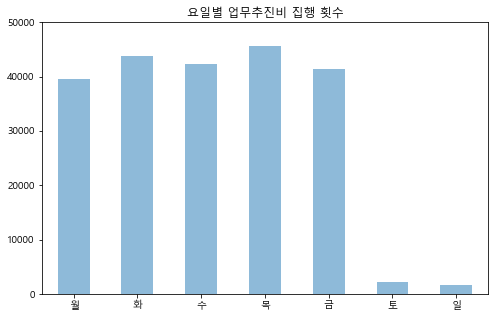

In [128]:
expense_weekday.plot.bar(rot=0,width=0.5,alpha=0.5,tick_label=week_day_name)
plt.ylim(0,50000)
plt.title('요일별 업무추진비 집행 횟수')

In [133]:
expense_hour_num=df_expense_all['집행일시_시간'].value_counts()
#expense_hour_num = expense_hour_num.sort_values()
work_hour=[(k+8)%24 for k in range(24)]
expense_hour_num = expense_hour_num.reindex(index=work_hour)
expense_hour_num

8       875
9      3486
10     5824
11     8356
12    87518
13    20990
14     8311
15     7168
16     5169
17     2889
18     5783
19    16766
20    23013
21    12210
22     2563
23      128
0      4919
1        44
2        19
3        27
4        26
5        19
6        42
7       412
Name: 집행일시_시간, dtype: int64

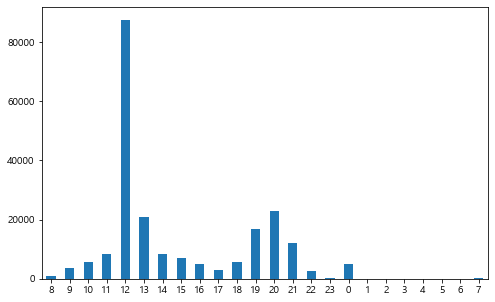

In [135]:
expense_hour_num.plot.bar(rot=0)
plt.show()

In [138]:
work_hour=[(k+8)%24 for k in range(24)]
expense_hour_total=df_expense_all.pivot_table(index=['집행일시_시간'],values=['집행금액'],aggfunc='sum')
expense_hour_total=expense_hour_total.reindex(index=work_hour)
expense_hour_total

,집행금액
집행일시_시간,
8,90249830
9,553266459
10,945747915
11,936712357
12,9097837583
13,2912433687
14,1338862483
15,1131139161
16,806967618


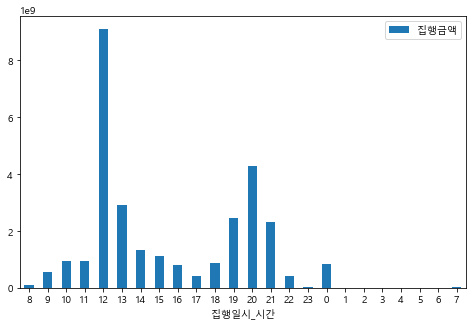

In [139]:
expense_hour_total.plot.bar(rot=0)
plt.show()